In [ ]:
#Only use if sandbox is not installed
import os,sys
sys.path.append('../../../')
#import warnings
#warnings.filterwarnings("ignore")

## Initialize Sensor and Projector

In [ ]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [3]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, 
                name="dummy", 
                gauss_filter=False) #For this module, the sharper the edges, the better the reflexions can be seen.


/home/danielsk78/GitProjects/open_AR_Sandbox/sandbox/sensor/kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


JSON configuration loaded for sensor.
DummySensor initialized.


In [4]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


JSON configuration loaded for projector.


Launching server at http://localhost:35449
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


## Initialize marker detection

In [5]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


## Initialize main thread for live update

In [6]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco= aruco if 'aruco' in globals() else None)


In [7]:
# Start the thread 
main.run()

Thread started or resumed...


### Control the features of the main thread

In [8]:
main.widget_plot_module()

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colormap', value=True)
                [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                [3] Column
                    [0] Markdown(str)
                    [1] WidgetBox
                        [0] Checkbox(name='Show relief shading', value=True)
                        [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                        [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                        [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
            [1] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show contours', value=True)
                [2] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                [3] Checkbox(name='Show minor contours', value=True)
                [4] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                [5] Checkbox(name='Show contours label', value=True)
                [6] IntInput(name='set a contour l..., value=15, value_throttled=15)
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Aruco Detection', value=True)
                [2] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] WidgetBox
                            [0] Checkbox(name='Show aruco location', value=True)
                            [1] Checkbox(name='Show aruco id', value=True)
                            [2] Checkbox(name='Show line connecting a...)
                            [3] ColorPicker(name='Color', value='#ff0000')
                        [1] WidgetBox
                            [0] Markdown(str)
                            [1] Row
                                [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                            [2] Button(button_type='success', name='Add dummy aruco dict')
                            [3] Button(button_type='warning', name='Clear aruco dict')
            [1] Column
                [0] Markdown(str)
                [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                [2] Checkbox(name='Check changes in fame')
                [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                [4] Button(button_type='warning', name='Clear axes from p...)

## Import the desired module

In [9]:
# Import the modules to use
from sandbox.modules.devito import SeismicModule

In [10]:
seis = SeismicModule(extent = sensor.extent)

LoadSaveTopoModule loaded succesfully
SeismicModule loaded succesfully


## Add the module to the main thread

In [11]:
main.add_module(name ='Seis', module=seis)

module Seis added to modules


## Now we can start the simulation

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Markdown(str)
                [1] IntSlider(end=262, name='x box origin', value=40, value_throttled=40)
                [2] IntSlider(end=208, name='y box origin', value=40, value_throttled=40)
                [3] IntSlider(end=262, name='box width', value=200, value_throttled=200)
                [4] IntSlider(end=208, name='box height', value=150, value_throttled=150)
                [5] Markdown(str)
                [6] Button(button_type='success', name='Snapshot')
                [7] Markdown(str)
                [8] RadioBoxGroup(name='Show in sandbox', options=['None', 'Show topography'...], value='None')
            [1] Matplotlib(Figure, height=500)
    [1] Column
        [0] Markdown(str)
        [1] WidgetBox
            [0] Markdown(str)
            [1] IntSlider(end=50, name='Release area width', start=1, value=10, value_throttled=10)
            [2] IntSlider(end=50, name='Release area height', start=1, value=10, value_throttled=10)
            [3] RadioButtonGroup(button_type='success', name='Show or erase the areas', options=['Show', 'Erase'])
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a folder t..., value='/home/danielsk78/GitProje...)
        [3] Markdown(str)
        [4] Button(name='Load Files in folder')
        [5] Markdown(str)
        [6] WidgetBox
            [0] RadioBoxGroup(name='Available Topographies', options=['None'], value='None')
        [7] Markdown(str)
        [8] FileSelector(directory='/home/danielsk78')
        [9] Button(button_type='success', name='Load other')
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] TextInput(name='Choose a filename t..., value='/home/danielsk78/GitProje...)
        [3] Markdown(str)
        [4] Button(name='Save')
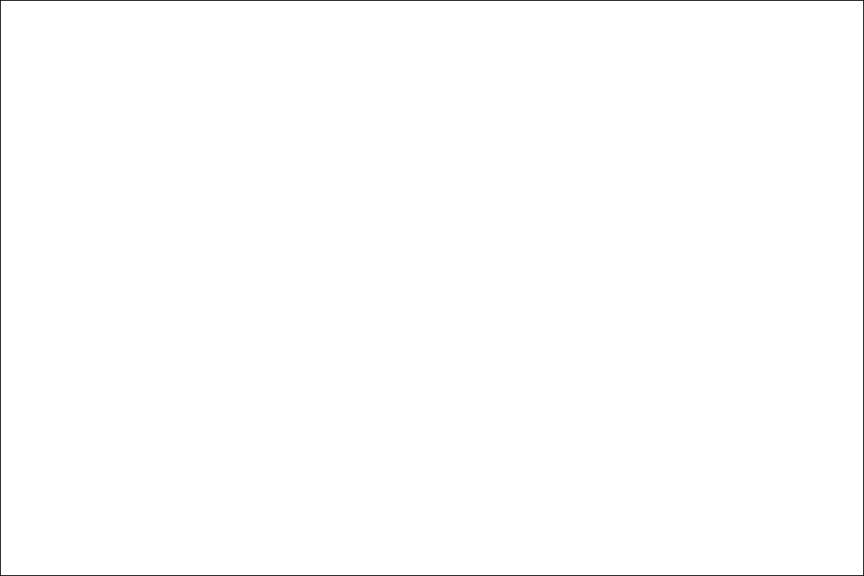

In [12]:
#Set the area for the simulation by modifying the extent of the box
seis.Load_Area.show_widgets()

### 1) Create a velocity model based on the sandbox topography 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#We are going to perform the simulation offline. 
#This is because the simulation is breaking the thread of the sandbox
main.stop()

In [ ]:
vp = seis.frame
vmax = 5 # maximum velocity corresponding to the top part of the sandbox 
vmin = 2 # minimum velocity corresponding to the top part of the sandbox 
model = seis.create_velocity_model(vp, vmax = vmax, vmin = vmin)
# The model have many other features to change - see documentation for more information

In [ ]:
seis.show_velocity(model)

### 2) Create time axis - This will be the time duration of the model (Time step already defined by the model

In [ ]:
t0 = 0
tn =  800 # [ms]
time_range = seis.create_time_axis(t0, tn)
print("Simulation from %d to %d [ms], with step size of %.4f" %(time_range.start, time_range.stop, time_range.step))
print("Total amount of time-frames: %i" %time_range.num)

### 3) Create the time function so we can define the PDE to solve

In [ ]:
seis.create_time_function()

### 4) Solve the PDE in a time-marching way updating u(t+dt) from the previous time step

In [ ]:
seis.solve_PDE()

### 5) Insert a source term. Use the aruco markers to indicate the source point for the wavefields - Multiple arucos can be used

In [ ]:
# If no arucos, you can simulate an aruco marker with this command
main.run()
dict_position = {1:[70,70],2:[50,50]} 
frame = sensor.get_frame()
aruco.set_aruco_position(dict_position, frame)
main.stop()
#Try running again if you can not see the arucos on the screen 

In [ ]:
# Insert the aruco markers as sources
seis.insert_aruco_source()

In [ ]:
# You should be able to see the aruco markers in the image below
seis.show_velocity(seis.model, source=seis.src_coordinates)

### 6) solve the PDE taking into account the source term

In [ ]:
seis.operator_and_solve()

In [ ]:
# To visualize the solution in a specific time frame use:
seis.timeslice = 300
seis.show_wavefield(seis.timeslice)

### 7) Optional: if you want to include some shot_record to view the seismic_trace if some recorders are placed

In [ ]:
# create the receivers
rec = seis.create_receivers(name='rec', n_receivers=100, depth_receivers=20, show_receivers=False)
rec

In [ ]:
# Interpolate the receivers
seis.interpolate_receiver(rec)

In [ ]:
# solve and display the solution
seis.operator_and_solve()

In [ ]:
seis.show_velocity(seis.model, source=seis.src_coordinates,
                       receiver=rec.coordinates.data)

In [ ]:
seis.show_shotrecord(rec.data, seis.model, 0, 2000)

### 8) To see the results in the sandbox modify the following variables

In [ ]:
#start the thread
main.run()

In [ ]:
# To see the waves continuously propagating set self.real_time to True 
seis.real_time = True

In [ ]:
#To make the step size of the plotting faster or slower, 
#change the step size for the frame plotting. 
#Higher number mean faster plotting
seis.framerate = 10

In [ ]:
#To hide the velocity plot form the sandbox change the flag
seis.p_velocity = False


#To hide the wavefield plot form the sandbox change the flag
seis.p_wave = False

In [ ]:
seis.p_velocity = True
seis.p_wave = True

#### 8.1) Is also possible to run the previous using widgets

In [ ]:
seis.show_plotting_widgets()

## Finally - All can be summarized with the widgets

Source registered

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] FloatInput(name='vmax', value=5.0, value_throttled=5.0)
        [3] FloatInput(name='vmin', value=2.0, value_throttled=2.0)
        [4] IntInput(name='Damping thickness', value=40, value_throttled=40)
        [5] Button(button_type='success', name='Create velocity model')
        [6] Markdown(str)
        [7] IntInput(name='t0', value_throttled=0)
        [8] IntInput(name='tn', value=800, value_throttled=800)
        [9] Button(button_type='success', name='Create time axis')
        [10] Markdown(str)
        [11] Markdown(str)
        [12] FloatInput(name='Frequency (Hz)', step=1, value=25.0, value_throttled=25.0)
        [13] Button(button_type='warning', name='Insert sources')
        [14] Markdown(str)
        [15] Button(button_type='success', name='Solve PDE')
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure, tight=True)
        [2] Markdown(str)
        [3] Checkbox(name='Real time', value=True)
        [4] IntInput(name='Framerate', value=10, value_throttled=10)
        [5] FloatInput(name='Wavefield threshold', step=0.01, value=0.03, value_throttled=0.03)
        [6] Markdown(str)
        [7] IntSlider(name='Wavefield in frame', value_throttled=0)
        [8] Markdown(str)
        [9] Checkbox(name='Velocity Model', value=True)
        [10] Checkbox(name='Wavefield', value=True)
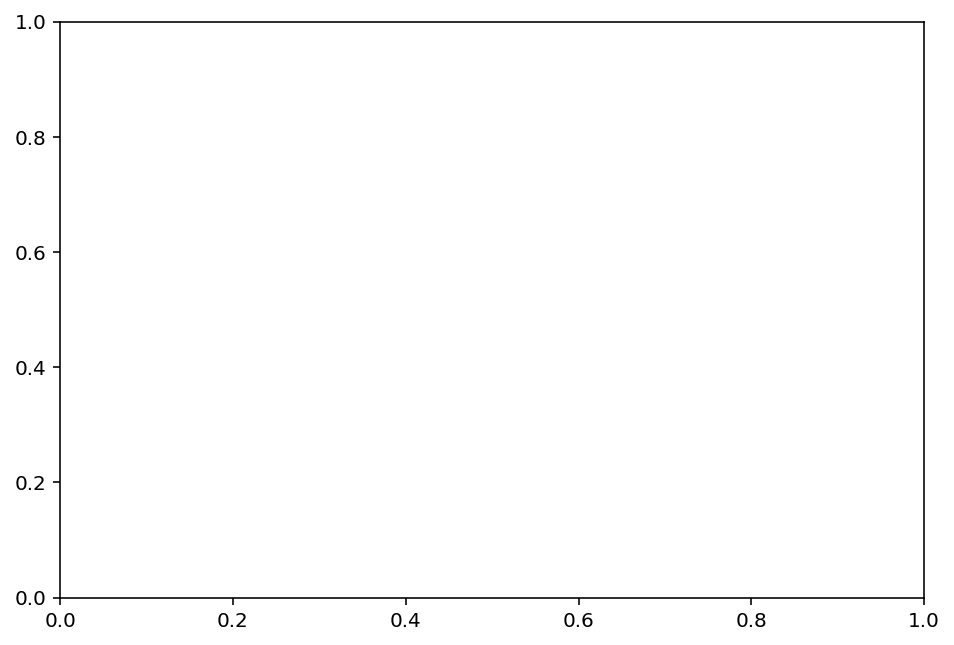

In [13]:
seis.show_widgets()

In [ ]:
#simulation_data = dict(vmax = 5.0,
#                       vmin = 2.0, 
#                       t0 = 0,
#                       tn = 1000,
#                       nbl = 40, # size of the absorbing layer
#                       smooth = False, # smoothing of the velocity model
#                       sigma_x = 2, # if smoothing True
#                       sigma_y = 2, # if smoothing True
##                       spacing = (10, 10), # grid spacing in meters - for scaling the model
 #                      origin = (0, 0), # origin of the model 
 #                     )
#seis.insert_aruco_source()
#seis.run_simulation(**simulation_data)

In [ ]:
# Stop sandbox






main.stop()